In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tiny import PointCloudDiffusion
import json
import torch
from tiny.utils import plot_point_clouds

/home/ubuntu/.cache/pypoetry/virtualenvs/tiny-text-to-3d-c32y3Mwx-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dit_config_path = "./configs/diffusion/dit-base.json"
dit_config = json.load(open(dit_config_path))
diffusion = PointCloudDiffusion.from_config(dit_config)

diffusion

05/18/2024 18:30:15 - INFO - root - Loaded ViT-B-32 model config.


05/18/2024 18:30:17 - INFO - root - Loading pretrained ViT-B-32 weights (laion2b_s34b_b79k).


PointCloudDiffusion(
  (noise_scheduler): NoiseScheduler()
  (model): CLIPConditionalPointCloudDiT(
    (x_embed): Linear(in_features=3, out_features=128, bias=True)
    (t_embed): TimestepEmbedding(
      (mlp): Sequential(
        (0): Linear(in_features=512, out_features=128, bias=True)
        (1): SiLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
    )
    (c_embed): Linear(in_features=512, out_features=128, bias=True)
    (dit_blocks): ModuleList(
      (0-23): 24 x DiTBlock(
        (layernorm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (layernorm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (adaLN_modulation): Sequential(
          (0): SiLU()
          (1): Linear(in_features=128, out_features=768, bias=True)
        )
        (mlp): MLP(
          (mlp): Sequential(
            (0): Linear(in_features=128, out_features=512, bias=True)
            (1): GELU(approximate='tanh')
            (2): Dropout(p=0,

In [4]:
checkpoint = torch.load("./checkpoints/walrus-modelnet40/checkpoint-128000/checkpoint.pt")
weights = checkpoint["weights"]
weights

OrderedDict([('null_token',
              tensor([[ 0.0249, -0.0651, -0.0555, -0.1616, -0.0772, -0.1135,  0.0263, -0.0194,
                       -0.0338,  0.1842, -0.1108, -0.0361,  0.0033,  0.0269, -0.1405, -0.0394,
                       -0.1200, -0.0320, -0.0836, -0.1064,  0.1079,  0.1866, -0.1213,  0.0091,
                        0.0360,  0.0919,  0.1784,  0.0708,  0.1611, -0.0014,  0.0248,  0.0245,
                       -0.2482, -0.0335,  0.0815, -0.0111, -0.0837,  0.1546,  0.0309, -0.1267,
                        0.0949, -0.1905, -0.0092,  0.0210,  0.0808,  0.1436, -0.0503, -0.1520,
                        0.1444,  0.0060,  0.0126, -0.1182,  0.0433, -0.0405,  0.1368,  0.0382,
                        0.1383,  0.0066, -0.1416,  0.1554, -0.1275, -0.0034,  0.0327,  0.1348,
                       -0.0029,  0.1232, -0.1651, -0.0417,  0.0835,  0.1384, -0.0978,  0.1602,
                       -0.1091, -0.1096,  0.1020, -0.1619, -0.1788, -0.1256,  0.1280,  0.1087,
                      

In [5]:
diffusion.model.load_state_dict(weights)

<All keys matched successfully>

In [6]:
diffusion.to("cuda")

PointCloudDiffusion(
  (noise_scheduler): NoiseScheduler()
  (model): CLIPConditionalPointCloudDiT(
    (x_embed): Linear(in_features=3, out_features=128, bias=True)
    (t_embed): TimestepEmbedding(
      (mlp): Sequential(
        (0): Linear(in_features=512, out_features=128, bias=True)
        (1): SiLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
    )
    (c_embed): Linear(in_features=512, out_features=128, bias=True)
    (dit_blocks): ModuleList(
      (0-23): 24 x DiTBlock(
        (layernorm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (layernorm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (adaLN_modulation): Sequential(
          (0): SiLU()
          (1): Linear(in_features=128, out_features=768, bias=True)
        )
        (mlp): MLP(
          (mlp): Sequential(
            (0): Linear(in_features=128, out_features=512, bias=True)
            (1): GELU(approximate='tanh')
            (2): Dropout(p=0,

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:01<00:00, 18.16it/s]


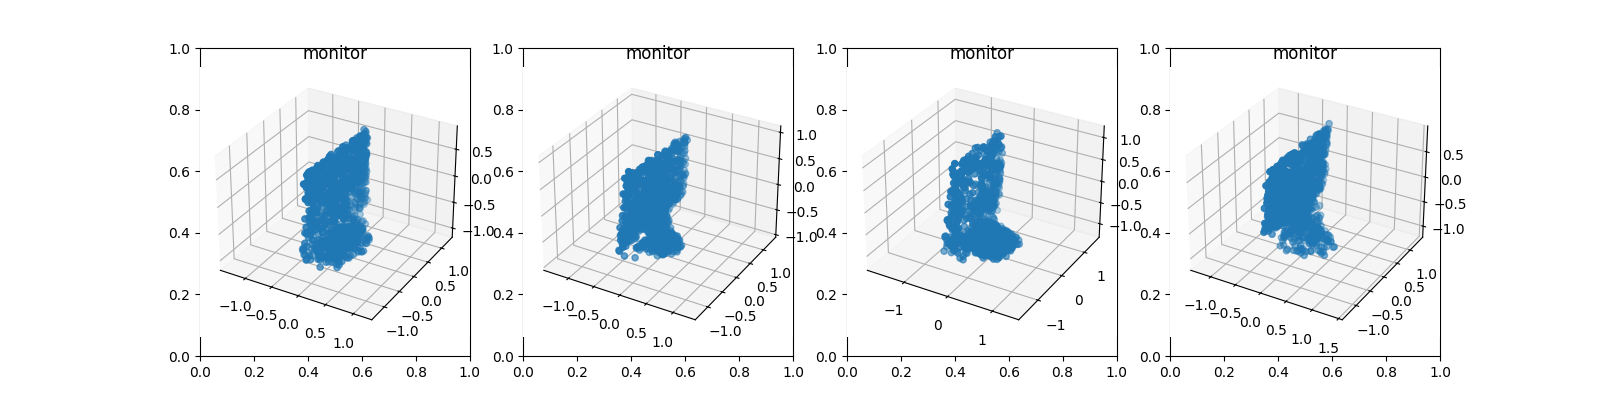

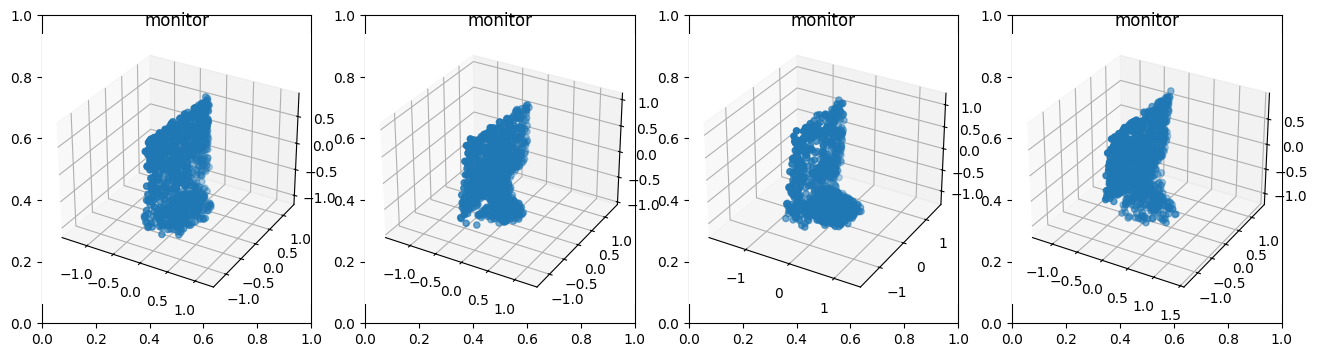

In [39]:
cond = ["monitor"] * 4
samples = diffusion.sample_loop(4, cond, num_inference_steps=30, guidance_scale=2, use_cfg=True, clip_denoised=False)
plot_point_clouds(samples, 1, 4, titles=cond)